# DsDA Controller

Creates multiple dataset and runs them through the DsDA method

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

Load densities trained on 19 beer data (see [loader_kde](loader_kde.ipynb)).

In [7]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'

In [8]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers.p'))

Load chromatogram data exported from R

In [9]:
cc = ChromatogramCreator(os.path.join(base_dir, 'Trained Models\\chromatogram_19_beers.csv.gz'))

INFO:ChromatogramCreator:Loading 0 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 1674
DEBUG:ChromatogramCreator:Invalid chromatogram 1778
DEBUG:ChromatogramCreator:Invalid chromatogram 1932
DEBUG:ChromatogramCreator:Invalid chromatogram 1989
DEBUG:ChromatogramCreator:Invalid chromatogram 2052
DEBUG:ChromatogramCreator:Invalid chromatogram 2276
DEBUG:ChromatogramCreator:Invalid chromatogram 2296
DEBUG:ChromatogramCreator:Invalid chromatogram 2424
DEBUG:ChromatogramCreator:Invalid chromatogram 2557
DEBUG:ChromatogramCreator:Invalid chromatogram 2559
DEBUG:ChromatogramCreator:Invalid chromatogram 2586
DEBUG:ChromatogramCreator:Invalid chromatogram 2610
DEBUG:ChromatogramCreator:Invalid chromatogram 3173
DEBUG:ChromatogramCreator:Invalid chromatogram 3208
DEBUG:ChromatogramCreator:Invalid chromatogram 3238
DEBUG:ChromatogramCreator:Invalid chromatogram 3252
DEBUG:ChromatogramCreator:Invalid chromatogram 3484
DEBUG:ChromatogramCreator:Invalid chromatogram 3547
DEBUG:Chromatog

DEBUG:ChromatogramCreator:Invalid chromatogram 43082
DEBUG:ChromatogramCreator:Invalid chromatogram 43485
DEBUG:ChromatogramCreator:Invalid chromatogram 43529
DEBUG:ChromatogramCreator:Invalid chromatogram 43936
DEBUG:ChromatogramCreator:Invalid chromatogram 43996
DEBUG:ChromatogramCreator:Invalid chromatogram 44322
DEBUG:ChromatogramCreator:Invalid chromatogram 44788
INFO:ChromatogramCreator:Loading 45000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 45111
DEBUG:ChromatogramCreator:Invalid chromatogram 45951
DEBUG:ChromatogramCreator:Invalid chromatogram 45979
DEBUG:ChromatogramCreator:Invalid chromatogram 46300
DEBUG:ChromatogramCreator:Invalid chromatogram 46346
DEBUG:ChromatogramCreator:Invalid chromatogram 46596
DEBUG:ChromatogramCreator:Invalid chromatogram 46609
DEBUG:ChromatogramCreator:Invalid chromatogram 46638
DEBUG:ChromatogramCreator:Invalid chromatogram 46817
DEBUG:ChromatogramCreator:Invalid chromatogram 47544
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 77285
DEBUG:ChromatogramCreator:Invalid chromatogram 77309
DEBUG:ChromatogramCreator:Invalid chromatogram 77404
DEBUG:ChromatogramCreator:Invalid chromatogram 77551
DEBUG:ChromatogramCreator:Invalid chromatogram 77656
DEBUG:ChromatogramCreator:Invalid chromatogram 77778
DEBUG:ChromatogramCreator:Invalid chromatogram 78411
DEBUG:ChromatogramCreator:Invalid chromatogram 78413
DEBUG:ChromatogramCreator:Invalid chromatogram 78658
DEBUG:ChromatogramCreator:Invalid chromatogram 78754
DEBUG:ChromatogramCreator:Invalid chromatogram 78857
DEBUG:ChromatogramCreator:Invalid chromatogram 79144
DEBUG:ChromatogramCreator:Invalid chromatogram 79169
DEBUG:ChromatogramCreator:Invalid chromatogram 79322
DEBUG:ChromatogramCreator:Invalid chromatogram 79363
INFO:ChromatogramCreator:Loading 80000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 80563
DEBUG:ChromatogramCreator:Invalid chromatogram 80695
DEBUG:ChromatogramCreator:Invalid chromatogram

DEBUG:ChromatogramCreator:Invalid chromatogram 105782
DEBUG:ChromatogramCreator:Invalid chromatogram 106020
DEBUG:ChromatogramCreator:Invalid chromatogram 106084
DEBUG:ChromatogramCreator:Invalid chromatogram 106385
DEBUG:ChromatogramCreator:Invalid chromatogram 106418
DEBUG:ChromatogramCreator:Invalid chromatogram 106429
DEBUG:ChromatogramCreator:Invalid chromatogram 106995
DEBUG:ChromatogramCreator:Invalid chromatogram 107155
DEBUG:ChromatogramCreator:Invalid chromatogram 107174
DEBUG:ChromatogramCreator:Invalid chromatogram 107601
DEBUG:ChromatogramCreator:Invalid chromatogram 107628
DEBUG:ChromatogramCreator:Invalid chromatogram 108028
DEBUG:ChromatogramCreator:Invalid chromatogram 108197
DEBUG:ChromatogramCreator:Invalid chromatogram 108439
DEBUG:ChromatogramCreator:Invalid chromatogram 108492
DEBUG:ChromatogramCreator:Invalid chromatogram 108538
DEBUG:ChromatogramCreator:Invalid chromatogram 108781
DEBUG:ChromatogramCreator:Invalid chromatogram 108856
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 133306
DEBUG:ChromatogramCreator:Invalid chromatogram 133322
DEBUG:ChromatogramCreator:Invalid chromatogram 133426
DEBUG:ChromatogramCreator:Invalid chromatogram 133789
DEBUG:ChromatogramCreator:Invalid chromatogram 133832
DEBUG:ChromatogramCreator:Invalid chromatogram 133882
DEBUG:ChromatogramCreator:Invalid chromatogram 134113
DEBUG:ChromatogramCreator:Invalid chromatogram 134199
DEBUG:ChromatogramCreator:Invalid chromatogram 134241
DEBUG:ChromatogramCreator:Invalid chromatogram 134262
DEBUG:ChromatogramCreator:Invalid chromatogram 134320
DEBUG:ChromatogramCreator:Invalid chromatogram 134488
DEBUG:ChromatogramCreator:Invalid chromatogram 134876
DEBUG:ChromatogramCreator:Invalid chromatogram 134942
INFO:ChromatogramCreator:Loading 135000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 135316
DEBUG:ChromatogramCreator:Invalid chromatogram 135591
DEBUG:ChromatogramCreator:Invalid chromatogram 135700
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 156966
DEBUG:ChromatogramCreator:Invalid chromatogram 157243
DEBUG:ChromatogramCreator:Invalid chromatogram 157263
DEBUG:ChromatogramCreator:Invalid chromatogram 157289
DEBUG:ChromatogramCreator:Invalid chromatogram 157581
DEBUG:ChromatogramCreator:Invalid chromatogram 157622
DEBUG:ChromatogramCreator:Invalid chromatogram 157634
DEBUG:ChromatogramCreator:Invalid chromatogram 157816
DEBUG:ChromatogramCreator:Invalid chromatogram 157994
DEBUG:ChromatogramCreator:Invalid chromatogram 158645
DEBUG:ChromatogramCreator:Invalid chromatogram 158694
DEBUG:ChromatogramCreator:Invalid chromatogram 158748
DEBUG:ChromatogramCreator:Invalid chromatogram 159050
DEBUG:ChromatogramCreator:Invalid chromatogram 159105
DEBUG:ChromatogramCreator:Invalid chromatogram 159200
DEBUG:ChromatogramCreator:Invalid chromatogram 159202
DEBUG:ChromatogramCreator:Invalid chromatogram 159435
DEBUG:ChromatogramCreator:Invalid chromatogram 159725
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 178416
DEBUG:ChromatogramCreator:Invalid chromatogram 178585
DEBUG:ChromatogramCreator:Invalid chromatogram 178668
DEBUG:ChromatogramCreator:Invalid chromatogram 178731
DEBUG:ChromatogramCreator:Invalid chromatogram 179006
DEBUG:ChromatogramCreator:Invalid chromatogram 179153
DEBUG:ChromatogramCreator:Invalid chromatogram 179396
DEBUG:ChromatogramCreator:Invalid chromatogram 179412
DEBUG:ChromatogramCreator:Invalid chromatogram 179798
DEBUG:ChromatogramCreator:Invalid chromatogram 179928
INFO:ChromatogramCreator:Loading 180000 chromatograms
DEBUG:ChromatogramCreator:Invalid chromatogram 180009
DEBUG:ChromatogramCreator:Invalid chromatogram 180180
DEBUG:ChromatogramCreator:Invalid chromatogram 180284
DEBUG:ChromatogramCreator:Invalid chromatogram 180348
DEBUG:ChromatogramCreator:Invalid chromatogram 180396
DEBUG:ChromatogramCreator:Invalid chromatogram 180507
DEBUG:ChromatogramCreator:Invalid chromatogram 180551
DEBUG:ChromatogramCreator:In

DEBUG:ChromatogramCreator:Invalid chromatogram 196117
DEBUG:ChromatogramCreator:Invalid chromatogram 197009
DEBUG:ChromatogramCreator:Invalid chromatogram 197029
DEBUG:ChromatogramCreator:Invalid chromatogram 197149
DEBUG:ChromatogramCreator:Invalid chromatogram 197178
DEBUG:ChromatogramCreator:Invalid chromatogram 197197
DEBUG:ChromatogramCreator:Invalid chromatogram 197336
DEBUG:ChromatogramCreator:Invalid chromatogram 197353
DEBUG:ChromatogramCreator:Invalid chromatogram 197398
DEBUG:ChromatogramCreator:Invalid chromatogram 197492
DEBUG:ChromatogramCreator:Invalid chromatogram 197493
DEBUG:ChromatogramCreator:Invalid chromatogram 197576
DEBUG:ChromatogramCreator:Invalid chromatogram 197656
DEBUG:ChromatogramCreator:Invalid chromatogram 197873
DEBUG:ChromatogramCreator:Invalid chromatogram 197901
DEBUG:ChromatogramCreator:Invalid chromatogram 198085
DEBUG:ChromatogramCreator:Invalid chromatogram 198250
DEBUG:ChromatogramCreator:Invalid chromatogram 198293
DEBUG:ChromatogramCreator:In

## Generate some chemicals

In [10]:
hmdb = load_obj(os.path.join(base_dir, 'Trained Models\\hmdb_compounds.p'))

In [11]:
chemicals = ChemicalCreator(ps)

In [12]:
min_ms1_intensity = 2E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1000)]
n_ms1_peaks = 1000
alpha = 0.1
# alpha = math.inf
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=2, chemical_type='Known',
               formula_list=None, compound_list=hmdb, alpha=math.inf, fixed_mz=False)

DEBUG:ChemicalCreator:1000 ms1 peaks to be created.
DEBUG:ChemicalCreator:i = 0
DEBUG:ChemicalCreator:i = 25
DEBUG:ChemicalCreator:i = 50
DEBUG:ChemicalCreator:i = 75
DEBUG:ChemicalCreator:i = 100
DEBUG:ChemicalCreator:i = 125
DEBUG:ChemicalCreator:i = 150
DEBUG:ChemicalCreator:i = 175
DEBUG:ChemicalCreator:i = 200
DEBUG:ChemicalCreator:i = 225
DEBUG:ChemicalCreator:i = 250
DEBUG:ChemicalCreator:i = 275
DEBUG:ChemicalCreator:i = 300
DEBUG:ChemicalCreator:i = 325
DEBUG:ChemicalCreator:i = 350
DEBUG:ChemicalCreator:i = 375
DEBUG:ChemicalCreator:i = 400
DEBUG:ChemicalCreator:i = 425
DEBUG:ChemicalCreator:i = 450
DEBUG:ChemicalCreator:i = 475
DEBUG:ChemicalCreator:i = 500
DEBUG:ChemicalCreator:i = 525
DEBUG:ChemicalCreator:i = 550
DEBUG:ChemicalCreator:i = 575
DEBUG:ChemicalCreator:i = 600
DEBUG:ChemicalCreator:i = 625
DEBUG:ChemicalCreator:i = 650
DEBUG:ChemicalCreator:i = 675
DEBUG:ChemicalCreator:i = 700
DEBUG:ChemicalCreator:i = 725
DEBUG:ChemicalCreator:i = 750
DEBUG:ChemicalCreator:i

## Multiple Datasets for DsDA

In [36]:
n_samples = [10]
classes = ["class1"]
intensity_noise_sd = [10000]
change_probabilities = None
change_differences_means = None
change_differences_sds = None
dropout_probabilities = None 
experimental_classes = None 
experimental_probabilitities = None 
experimental_sds = None

multiple_samples = MultiSampleCreator(dataset, n_samples, classes, intensity_noise_sd, 
                                      change_probabilities, change_differences_means, change_differences_sds, dropout_probabilities,
                                     experimental_classes, experimental_probabilitities, experimental_sds)

DEBUG:MultiSampleCreator:Classes, Statuses and Differences defined.
DEBUG:MultiSampleCreator:Dataset 1 of 10 created.
DEBUG:MultiSampleCreator:Dataset 2 of 10 created.
DEBUG:MultiSampleCreator:Dataset 3 of 10 created.
DEBUG:MultiSampleCreator:Dataset 4 of 10 created.
DEBUG:MultiSampleCreator:Dataset 5 of 10 created.
DEBUG:MultiSampleCreator:Dataset 6 of 10 created.
DEBUG:MultiSampleCreator:Dataset 7 of 10 created.
DEBUG:MultiSampleCreator:Dataset 8 of 10 created.
DEBUG:MultiSampleCreator:Dataset 9 of 10 created.
DEBUG:MultiSampleCreator:Dataset 10 of 10 created.


In [37]:
intensities_1 = np.array([chem.max_intensity for chem in multiple_samples.samples[0]])
intensities_2 = np.array([chem.max_intensity for chem in multiple_samples.samples[1]])
intensities_3 = np.array([chem.max_intensity for chem in multiple_samples.samples[2]])

In [38]:
intensities = np.stack([intensities_1, intensities_2, intensities_3], axis=1)
intensities = np.log(intensities)

In [42]:
print(multiple_samples.samples[0][0])
print(multiple_samples.samples[1][0])
print(multiple_samples.samples[2][0])

KnownChemical - 'C28H55NO3' rt=339.93 max_intensity=405640.37
KnownChemical - 'C28H55NO3' rt=339.93 max_intensity=399689.78
KnownChemical - 'C28H55NO3' rt=339.93 max_intensity=387382.06


In [39]:
intensities.shape

(1000, 3)

{'whiskers': [<matplotlib.lines.Line2D at 0x24c483e4cf8>,
 'caps': [<matplotlib.lines.Line2D at 0x24c48797080>,
 'boxes': [<matplotlib.lines.Line2D at 0x24c4895a630>,
 'medians': [<matplotlib.lines.Line2D at 0x24c4931a3c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x24c48e04470>,
 'means': []}

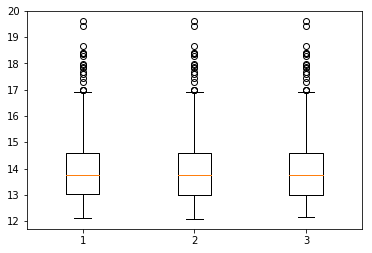

In [40]:
plt.boxplot(intensities)

## Set up a DsDA controller

We can run the dataset through a DsDA controller

In [43]:
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window (Dalton) around a selected precursor ion
rt_tol = 15                     # the rt window (second) around a selected precursor ion to prevent it from fragmented multiple times
min_ms1_intensity = 2.5E5       # the minimum ms1 peak intensity to be fragmented

In [46]:
dsda_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\DsDA\\'
mzml_dir = os.path.join(dsda_dir, 'DsDA_Test\\Data')
settings_dir = os.path.join(dsda_dir, 'DsDA_Test\\settings')
schedule_template = os.path.join(dsda_dir, 'DsDA_schedule.csv')

In [ ]:
class DsDAMassSpec(IndependentMassSpectrometer):
    
    def run(self, min_time, max_time, pbar=None):
        pass
    
    def get_next_scan(self, param):
        pass

In [ ]:
class DsDAController(Controller):
    def __init__(self, mass_spec, N, schedule_template):
        super().__init__(mass_spec)
        self.schedule_file = schedule_file

        mass_spec.reset()

        # register new event handlers under this controller
        mass_spec.register(MassSpectrometer.MS_SCAN_ARRIVED, self.handle_scan)
        mass_spec.register(MassSpectrometer.ACQUISITION_STREAM_OPENING, self.handle_acquisition_open)
        mass_spec.register(MassSpectrometer.ACQUISITION_STREAM_CLOSING, self.handle_acquisition_closing)

    def run(self, progress_bar=True):
        if progress_bar:
            with tqdm(total=max_time - min_time, initial=0) as pbar:
                self.mass_spec.run(min_time, max_time, pbar=pbar)
        else:
            self.mass_spec.run(min_time, max_time)

    def handle_acquisition_open(self):
        self.logger.info('Acquisition open')

    def handle_acquisition_closing(self):
        self.logger.info('Acquisition closing')

    def _process_scan(self, scan):
        self.logger.info('Received {}'.format(scan))
        if scan.ms_level == 1: # we get an ms1 scan, if it has a peak, then store it for fragmentation next time
            if scan.num_peaks > 0:
                self.last_ms1_scan = scan
            else:
                self.last_ms1_scan = None

        elif scan.ms_level == 2:  # if we get ms2 scan, then do something with it
            # scan.filter_intensity(self.min_ms2_intensity)
            if scan.num_peaks > 0:
                self._plot_scan(scan)

    def _update_parameters(self, scan):
        pass # TODO

In [ ]:
mass_spec = DsDAMassSpec(POSITIVE, dataset, density=ps.density_estimator)
controller = DsDAController(mass_spec, schedule_template)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', os.path.join(base_dir, 'DsDA\DsDA_Test\Data\\output.mzML'))